# Programming Homework 1

## ReadMe

In [3]:
# Print in color
def cprint(dna):
    from termcolor import colored
    colors = {'A':'red', 'C' : 'green', 'G' :'magenta', 'T' : 'blue','N':'white'}
    print("".join(colored(base, colors[base] if base in 'ATCGN' else 'white') for base in dna))
    
cprint('this is a AAAAATTTTNGCC')

this is a AAAAATTTTNGCC


In [2]:
colors = {'A':'red', 'C' : 'green', 'G' :'magenta', 'T' : 'blue','N':'white'}
base ='a'
colors[base] if base in 'ATCGN' else 'white'

'white'

### In lecture and in a practical, we saw an implementation of the naive exact matching algorithm:

In [4]:
def naive(pattern,text):
    occurrences = []
    for i in range(len(text) - len(pattern) + 1): #loop over alignments
        match = True
        for j in range(len(pattern)):
            if text[i+j] != pattern[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return(occurrences)
        

### ...and we saw a function that takes a DNA string and returns its reverse complement:

In [5]:
def reverseComplemnet(dna):
    complement = {'A': 'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    reverse_dna = ''
    for base in dna:
        reverse_dna = complement[base] + reverse_dna
    return reverse_dna

### ...and we saw a function that parses a DNA reference genome from a file in the FASTA format.

In [6]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### ...and we saw a function that parses the read and quality strings from a FASTQ file containing sequencing reads.

In [7]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0: # If line reaches end of file seq value become 0
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

## Assignment
First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [8]:
def naive_with_rc(pattern,text):
    return list(set(naive(pattern,text) + naive(reverseComplemnet(pattern),text)))

### Test 1

In [9]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' +  ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


### Test 02

In [10]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[24, 10]


### Test 03


In [11]:
phix_genome = readGenome('data/phix.fa')

In [12]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [13]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [14]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


## Programming Homework 1

#### Downloading Lambda Virus Genomes 


In [15]:
import wget
url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
#wget.download(url,out='data/')

'data//lambda_virus (1).fa'

In [16]:
# Reading Lambda Virus Genome
lambda_genome = readGenome('data/lambda_virus.fa')


#### Question 1 : How many times does `AGGT` or its reverse complement `ACCT` occur in the lambda virus genome?  E.g. if `AGGT` occurs 10 times and `ACCT` occurs 12 times, you should report 22.

In [17]:
occurrences = naive_with_rc('AGGT', lambda_genome)
print('# occurrences of AGGT: %d Times' % len(occurrences))

# occurrences of AGGT: 306 Times


#### Question 2: How many times does `TTAA` or its reverse complement occur in the lambda virus genome?  

Hint: `TTAA `and its reverse complement are equal, so remember not to double count.

In [18]:
occurrences = naive_with_rc('TTAA', lambda_genome)
print('# occurrences of TTAA: %d Times' % len(occurrences))

# occurrences of TTAA: 195 Times


#### Question 3: What is the offset of the leftmost occurrence of `ACTAAGT` or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of `ACTAAGT` is at offset 40 (0-based) and the leftmost occurrence of its reverse complement CTTAGT is at offset 29, then report 29.

In [21]:
occurrences = naive_with_rc('ACTAAGT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 26028


#### Question 4: What is the offset of the leftmost occurrence of `AGTCGA` or its reverse complement in the Lambda virus genome?




In [19]:
occurrences = naive_with_rc('AGTCGA', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 450


### Question 5: As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the \verb|naive|naive function called \verb|naive_2mm|naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

For example, `ACTTTA` occurs twice in `ACTTACTTGATAAAGT`, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list `[0, 4]`.

### How many times does `TTCAAGCC` occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [20]:
def naive_hmm(pattern,text,hamming_distance = 2):
    occurrences = []
    for i in range(len(text) - len(pattern) + 1): #loop over alignments
        match = True
        miss_match_count = 0
        for j in range(len(pattern)):
            if text[i+j] != pattern[j]:
                if miss_match_count >= hamming_distance:
                    match = False
                    break
                else:
                     miss_match_count += 1
        if match:
            occurrences.append(i)
    return(occurrences)

In [21]:
naive_hmm('ACTTTA','ACTTACTTGATAAAGT')

[0, 4]

In [22]:
occurrences = naive_hmm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 10


#### Test 02


In [23]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_hmm(p, t)
print(occurrences)

[10, 24, 38]



#### How many times does `TTCAAGCC` occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [64]:
def naive_hmm_with_rc(pattern,text):
    return list(set(naive_hmm(pattern,text) + naive_hmm(reverseComplemnet(pattern),text)))

In [24]:
occurrences = naive_hmm('TTCAAGCC', lambda_genome)
cprint('# occurrences of TTCAAGCC: %d times' % len(occurrences))

# occurrences of TTCAAGCC: 191 times


In [25]:
pattern = 'AGGAGGTT'
occurrences = naive_hmm('AGGAGGTT', lambda_genome)
print(occurrences)
cprint('# occurrences of TTCAAGCC: %d times' % len(occurrences))

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

#### What is the offset of the leftmost occurrence of 'AGGAGGTT' in the Lambda virus genome when allowing up to 2 mismatches?

In [157]:
occurrences = naive_hmm('AGGAGGTT', lambda_genome)
cprint('AGGAGGTT offset of leftmost occurrence: %d' % min(occurrences))

AGGAGGTT offset of leftmost occurrence: 49



### Question 7
Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 `https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq`

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [110]:
import wget
url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'
wget.download(url,out='data/')

'data//ERR037900_1.first1000.fastq'

In [30]:
human_seq, _ = readFastq('data//ERR037900_1.first1000.fastq')
cprint(human_seq[0])
print("Read Length: ",len(human_seq[0]))

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC
Read Length:  100


In [32]:
def findGCbyPosition(reads):
    read_length = len(reads[0])
    gc = [0] * read_length
    total = [0] * read_length
    
    for read in reads:
        for i in range(read_length):
            if read[i] in 'GC':
                gc[i] += 1
            total[i] += total
    
    for i in range(read_length):
        gc[i] /= float(total[i])
    return gc


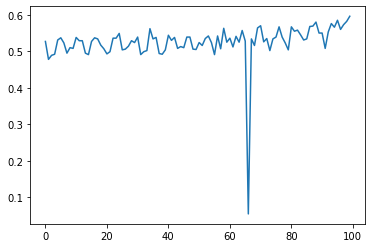

In [33]:
gc = findGCByPos(human_seq)
gc
plt.plot(range(len(gc)), gc)
plt.show()

In [36]:
print("Sequencing cycles is poor quality :", gc.index(min(gc)))

Sequencing cycles is poor quality : 66
